In [275]:
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## NYC Subway ridership impacted by weather analysis
### Overview and goal
This notebook document the steps of exploring provided dataset subway data set of NYC. This data set records statistics of NYC subway riders in different weather conditions in May 2011. From the dataset, we can see the entry and exit times on 4-hourly basic.
By exploring the dataset, we hope that can anwser some questions like:
    1. How busy categorized by day in a week?
    2. How rainy day impact on ridership?
    3. How correlation between rain and other weather conditions (fog, pressure, precipitation, temperature)

### Dataset quicklook
Here is some notes about the dataset:
    - Data is collected in 31 days in May
    - Data is sampled at 4-hourly basic 0, 4, 8, 12, 16, 20
    - Week days are labeled as 0, 1, 2, 3, 4 (Monday -> Friday), while weekend days are 5, 6 (Saturday & Sunday)
    - There are total 207 different stations in NYC which is so many
    - Weather conditions are classified under 12 different conditions
    

In [152]:
df = pd.read_csv("nyc_subway.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

In [148]:
df.describe(include='all')

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,weekday,station,latitude,longitude,conds,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,42649,42649,42649,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649,42649.000000,42649.000000,42649.000000,42649,42649.000000,42649.000000,42649,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
unique,240,31,6,NaN,NaN,NaN,NaN,186,NaN,NaN,NaN,207,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,R098,05-17-11,04:00:00,NaN,NaN,NaN,NaN,2011-05-30 20:00:00,NaN,NaN,NaN,34 ST-PENN STA,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,186,1417,7381,NaN,NaN,NaN,NaN,240,NaN,NaN,NaN,558,NaN,NaN,13594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.812486e+07,1.986993e+07,1886.589955,1361.487866,NaN,10.046754,2.905719,0.714436,NaN,40.724647,-73.940364,NaN,0.009824,0.004618,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,NaN,NaN,NaN,3.043607e+07,2.028986e+07,2952.385585,2183.845409,NaN,6.938928,2.079231,0.451688,NaN,0.071650,0.059713,NaN,0.098631,0.025832,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,40.576152,-74.073622,NaN,0.000000,0.000000,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,NaN,NaN,NaN,1.039762e+07,7.613712e+06,274.000000,237.000000,NaN,4.000000,1.000000,0.000000,NaN,40.677107,-73.987342,NaN,0.000000,0.000000,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,NaN,NaN,NaN,1.818389e+07,1.331609e+07,905.000000,664.000000,NaN,12.000000,3.000000,1.000000,NaN,40.717241,-73.953459,NaN,0.000000,0.000000,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,NaN,NaN,NaN,3.263049e+07,2.393771e+07,2255.000000,1537.000000,NaN,16.000000,5.000000,1.000000,NaN,40.759123,-73.907733,NaN,0.000000,0.000000,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033


### How ridership is distributed within days of a week?
There are 2 interesting points derived from data once visualize total entries/exits by day
    1. People use subway much more in weekday (Mon -> Friday). It is understandable that they are going for work.
    2. Total number of exits is less than total number of entries (supposed to be equal). Around 28-29% (weekday), 22-23% (weekend) of times not recorded at subway system. There is one potentital reason is that some people use emergency exit way instead of turnstile. Ref here: [Link](https://streeteasy.com/blog/nyc-subway-emergency-exit-can-i-use-it/)

In [208]:
# Build the dataframe that group by weekday, day of week to see the differences of check points during entry and exit at subway station
df_weekday = df.groupby(['weekday', 'day_week']).sum()[["ENTRIESn_hourly", "EXITSn_hourly"]]
df_weekday["diff_percentage"] = 100* (df_weekday["ENTRIESn_hourly"] - df_weekday["EXITSn_hourly"])/df_weekday["ENTRIESn_hourly"]
df_weekday

ENTRIESn_hourly  EXITSn_hourly  diff_percentage
weekday day_week                                                 
0       5               7486907.0      5695482.0        23.927438
        6               7218706.0      5596828.0        22.467711
1       0              12795107.0      9141366.0        28.555767
        1              15246943.0     10830056.0        28.969001
        2              12592691.0      8978552.0        28.700291
        3              12709142.0      8988618.0        29.274392
        4              12411679.0      8835194.0        28.815481

EXITSn_hourly always less than ENTRIESn_hourly with more 20% difference. Since there is potential of reason that people use emergency exit instead of turnstile,the following analysis of weather impact to ridership will take ENTRIEm_hourly data for better reliability.

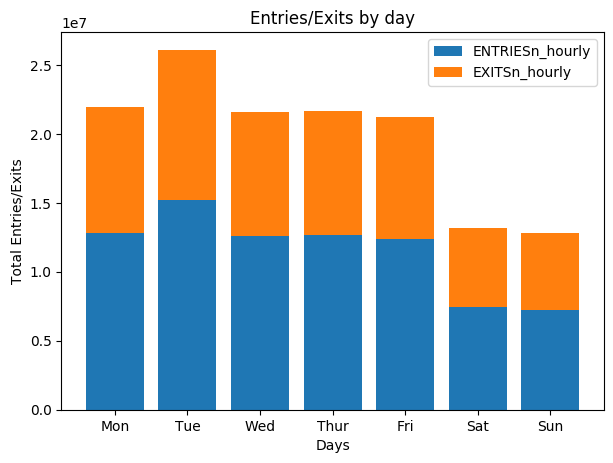

In [209]:
# Plot the entries/exits times plotted by days
day_riders = df.groupby('day_week').sum()

p1 = plt.bar(day_riders.index.values, day_riders["ENTRIESn_hourly"].values)
p2 = plt.bar(day_riders.index.values, day_riders["EXITSn_hourly"].values, bottom=day_riders["ENTRIESn_hourly"].values)

plt.xticks(range(7), ("Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"))
plt.ylabel("Total Entries/Exits")
plt.xlabel("Days")
plt.title("Entries/Exits by day")
plt.legend((p1[0], p2[0]), ("ENTRIESn_hourly", "EXITSn_hourly"))

plt.show()

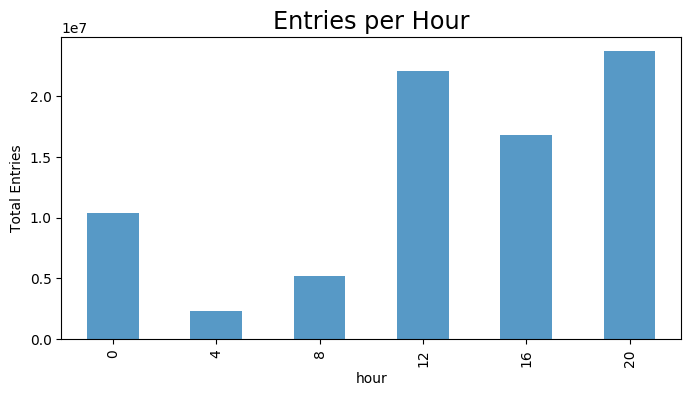

In [294]:
# Plot the total entries by hour
hour_riders = df.groupby('hour').sum()
hour_riders[['ENTRIESn_hourly']].plot(kind='bar', legend=False, figsize=(8, 4), alpha=0.75)
plt.title('Entries per Hour', {'fontsize':'xx-large'})
plt.xlabel('hour')
plt.ylabel('Total Entries')
plt.show()

People tend to use the subway more in weekday compared to weekend. And it is more crowded from 12h to 20h daily.

### Weather impact on ridership at NYC subway?
In this experiment, we aims at looking for any correlation between weather condition with the ENTRIESn_hourly.

- Summary:
    + No strong correlation between precipitation, pressure, temperature, wspd with the demand of subway riders
    + When it is raining, subway gets busier with more people using the subway
    + The `precipi` variable can tells the high probability of rain

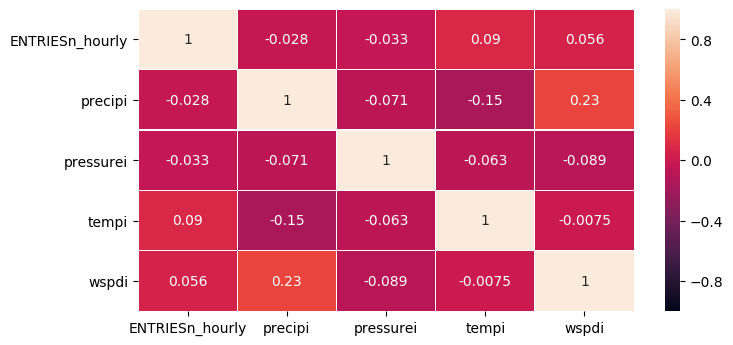

In [317]:
# To see the correlation between weather condition which is measured as continous variables (preci, pressure, temp and wspd)
# the heat map is used to visualize resutl.
# Based on the result, there is no strong signal for the correlation with ENTRIESn_hourly (biggest one is 0.036)
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df[["ENTRIESn_hourly", "precipi", "pressurei", "tempi", "wspdi"]].corr(), vmax=1, vmin=-1, annot=True, ax=ax, linewidths=0.1)
ax.set_ylim(5.0, 0)
plt.show()

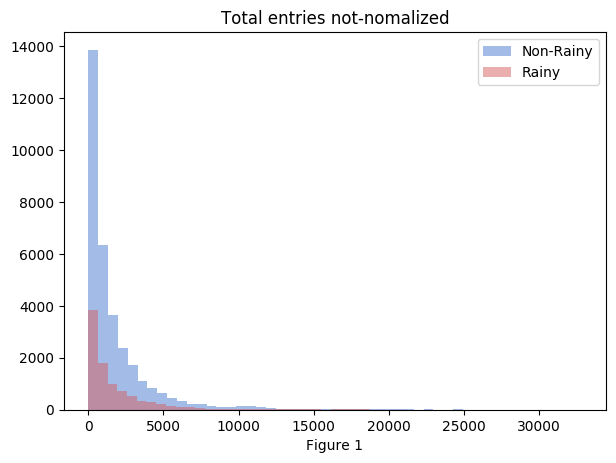

In [316]:
# Check the distribution of total entries record in rainy and not rainy day
rain = df[df['rain'] == 1]['ENTRIESn_hourly'].values
no_rain = df[df['rain'] == 0]['ENTRIESn_hourly'].values
plt.hist(no_rain, bins=50, color='b', alpha=0.5, label='Non-Rainy')
plt.hist(rain, bins=50, color='r', alpha=0.5, label='Rainy')
plt.title("Total entries not-nomalized")
plt.xlabel("Figure 1")
plt.legend()
plt.show()

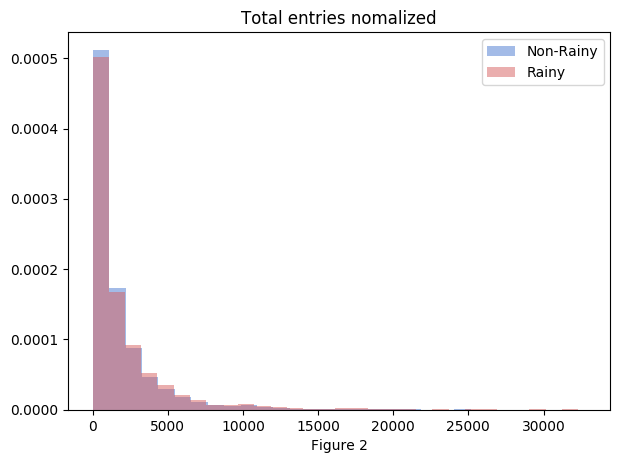

In [315]:
# Check the distribution of total entries record in rainy and not rainy day
rain = df[df['rain'] == 1]['ENTRIESn_hourly'].values
no_rain = df[df['rain'] == 0]['ENTRIESn_hourly'].values
plt.hist(no_rain, bins=30, color='b', alpha=0.5, label='Non-Rainy', density=True)
plt.hist(rain, bins=30, color='r', alpha=0.5, label='Rainy', density=True)
plt.title("Total entries nomalized")
plt.xlabel("Figure 2")
plt.legend()
plt.show();

Because number of non-rainy days is less than rainy then the plot clearly shows the frequency of total entries respectively for both cases (Figure 1). After normalized, we see that people tend to use subway in rainy day much more than non-rainy day (top 2 bin with biggest frequency of subway usage).


To evaluate whether rainy day impacts to subway ridership, we need to conduct the statistical test. In this case, we use Mann-Whitney U-Test (https://en.wikipedia.org/wiki/Mann–Whitney_U_test).

The significance level being used in this test is 0.05.
    
    𝐻0:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑎𝑛𝑑 𝑒𝑥𝑝𝑙𝑎𝑛𝑎𝑡𝑜𝑟𝑦 𝑣𝑎𝑟𝑖𝑎𝑏𝑙𝑒 𝑎𝑟𝑒 𝑖𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡
    𝐻𝑎:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑎𝑛𝑑 𝑒𝑥𝑝𝑙𝑎𝑛𝑎𝑡𝑜𝑟𝑦 𝑣𝑎𝑟𝑖𝑎𝑏𝑙𝑒 𝑎𝑟𝑒 𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡

In [304]:
# Mean calculation
rain_mean = df[df['rain'] == 1]['ENTRIESn_hourly'].mean()
norain_mean = df[df['rain'] == 0]['ENTRIESn_hourly'].mean()

print(f"Mean entries, with rain: {rain_mean}\nMean entries, without rain: {norain_mean}")

Mean entries, with rain: 2028.1960354720918
Mean entries, without rain: 1845.5394386644084


In [302]:
[U, p] = scipy.stats.mannwhitneyu(df[df['rain'] == 1]['ENTRIESn_hourly'],df[df['rain'] == 0]['ENTRIESn_hourly'])

print(f"Mann-Whitney Test Statistic: {U}\np-Value: {p}")

Mann-Whitney Test Statistic: 153635120.5
p-Value: 2.7410695712437496e-06


In [303]:
# Significance level.
alpha = 0.05

# Two-tailed test.
if (p * 2) < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject the null hypothesis


The result shows that rainy and non-rainy day are dependent. In other words, raining impact to the subway usage where people tend to prefer using subway.

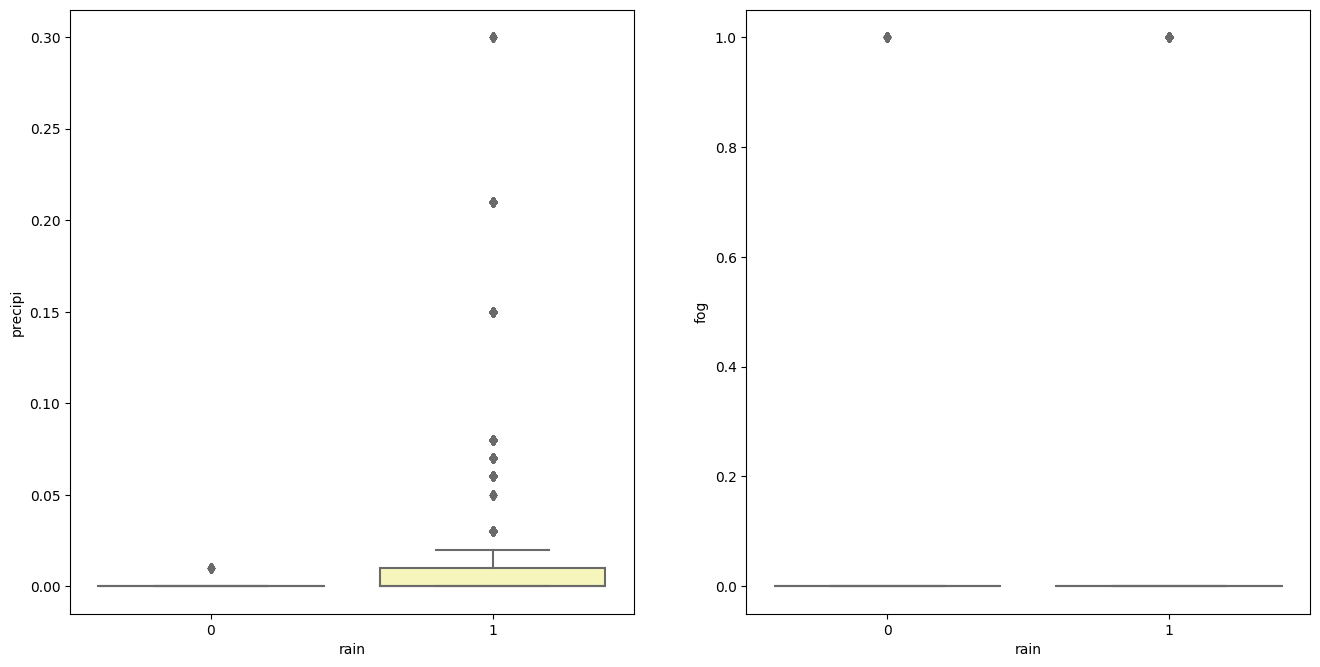

In [318]:
# Examine which parameter impact to rainy
fig, axs = plt.subplots(ncols=2, sharex=True, figsize=(16, 8))
sns.boxplot(x='rain', y='precipi', data=df, ax=axs[0], palette="Set3")
sns.boxplot(x='rain', y='fog', data=df, ax=axs[1], palette="Set3")
plt.show()

We see `precipi` has direct impact to rainy, it's mostly rainy when `precipi` values is determine as bigger than 0.